In [1]:
%load_ext burr.integrations.notebook

I see that `burr.tracking.client` mentions that there's a `SyncTrackingClient` but no `AsyncTrackingClient`. 

1. Create an `Application` with synchronous actions

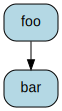

In [2]:
from burr.core import action, State, ApplicationBuilder

@action(reads=[], writes=["field1"])
def foo(state: State) -> State:
    return state.update(field1="value1")

@action(reads=["field1"], writes=["field2"])
def bar(state: State) -> State:
    value1 = state["field1"]
    return state.update(field2="value2")

def build_app():
    return  (
        ApplicationBuilder()
        .with_actions(foo, bar)
        .with_transitions(("foo", "bar"))
        .with_entrypoint("foo")
        .with_tracker(project="debugging")
        .build()
    )

build_app()

2. Run the `Application` with `.arun()` and setting a `halt_after` condition

In [3]:
app = build_app()
action_name, results, state = await app.arun(halt_after=["bar"])

3. View results in Burr UI. On `foo`, the state won't show the `field1` value. On `bar`, the state won't show `field2`.

In [4]:
%burr_ui

4. Now, running the `Application` with `.run()` will show `field1` and `field2` values. The two implementations are not equivalent.

In [5]:
app = build_app()
action_name, results, state = app.run(halt_after=["bar"])

5. If you were to do `halt_before`, the `field1` value still shows on `foo`. Then, `async` is not equivalent to "halting before". There's an operation that's happening in the wrong order

In [6]:
app = build_app()
action_name, results, state = app.run(halt_before=["bar"])